**Pit Design for open cast mining for production planning using mixed integer programming by Himanshu Bhardwaj**

**LERCHS-GROSSMANN 3-D Algorithm**
It is a grade blcok model 


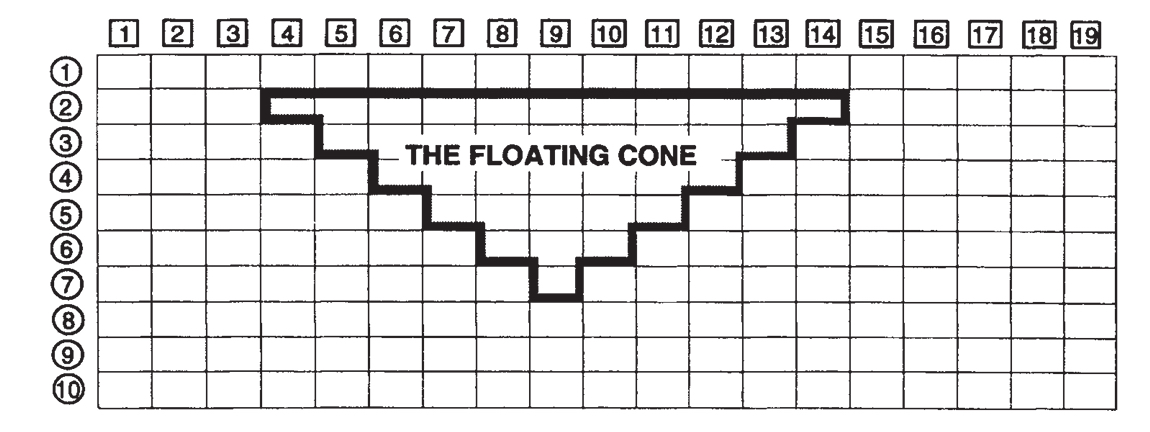

**Table-1: **
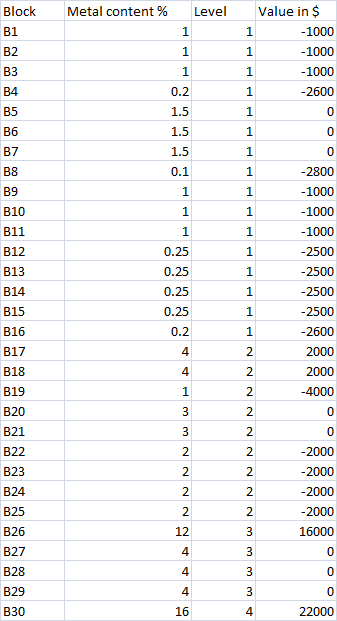

**Pyramid of blocks**

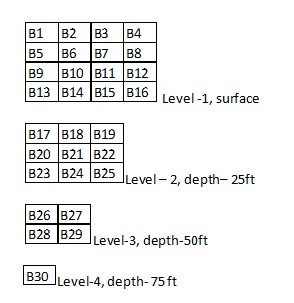

**Formulation of the problem into mixed integer problem**

**Decision variable**

$$block_b \in \{0,1\}$$ 1 if block<sub>b</sub> to be mined otherwise 0.

**Constraints**

if a block is extracted then four blocks above must also be extracted first. for example if B21 is extracted then B6, B7, B10, B11 must also be extracted. if a directed graph is drawn then each succsessor edge can only be mined after the predecessors.

block<sub>b</sub> >= block<sub>b1</sub>, where (b,b1) is an edge in the directed graph of adjency matrix of the blocks.

**objective function**
$$Maximize(\sum\limits_{b \in blocks} profit_{b}block_{b})$$

**Other information**

Profit of each block which depends upon the metal content, mining and milling cost and can be estimated by the following table
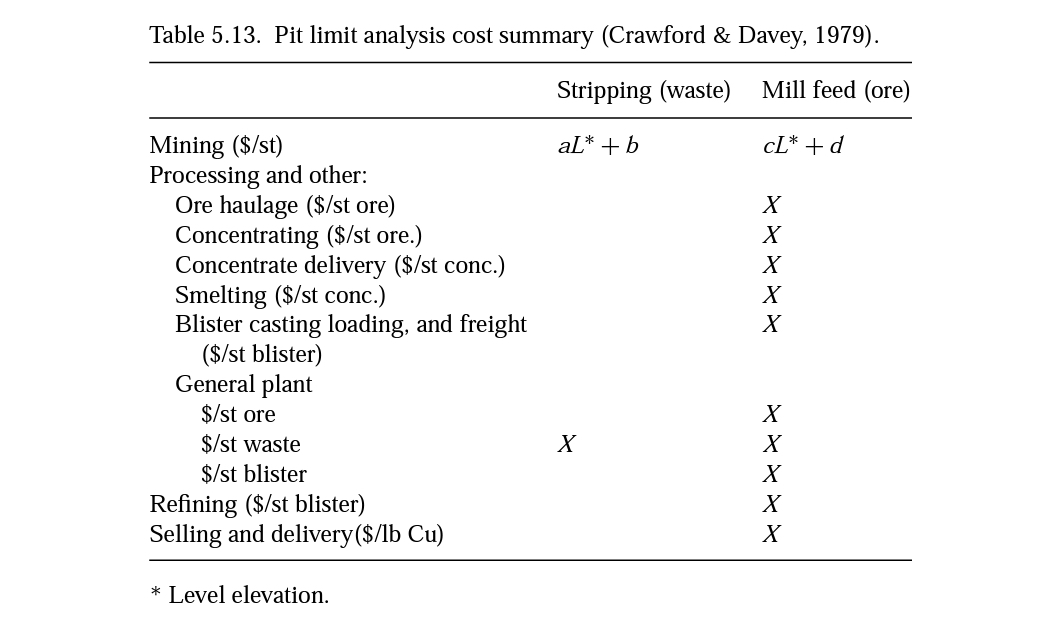

For simplicity of the calculation the revenue of each block is calculated by multiplying metal content % value into 100 % metal content revenue. For the calculation of the costabove format can are given above.be used to determine cost of each blocks and corresponding profit. Here, USD 200000 is taken as revenue if the metal content is 100 percent. for the sake of simplicity, average cost for each level has been taken for the calculation. The average cost for each level is as below

|Level| cost|
|---|---|
|level 1| USD 3000|
|level 2| USD 6000|
|level 3| USD 8000|
|level 4| USD 10000|

The blocks metal content % and corresponding profit is given in the above table-I.

In [20]:
from itertools import product
from graphviz import Digraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import GRB
import gurobipy as gy

In [21]:
#create pyramid
blocks = pd.read_csv('blocks.csv')
blocks

,P,T
0,"B1,B2,B5,B6",B17
1,"B2,B3,B6,B7",B18
2,"B3,B4,B7,B8",B19
3,"B5,B6,B9,B10",B20
4,"B6,B7,B10,B11",B21
5,"B7,B8,B11,B12",B22
6,"B9,B10,B13,B14",B23
7,"B10,B11,B14,B15",B24
8,"B11,B12,B15,B16",B25
9,"B17,B18,B20,B21",B26


In [63]:
import ptdesign2 as pit

In [64]:
G = pit.disp_graph(blocks)

Diagram showing the predecessor and successor relationship of blocks. for mining the successor blocks, each of the predecessor blocks must be mined first.

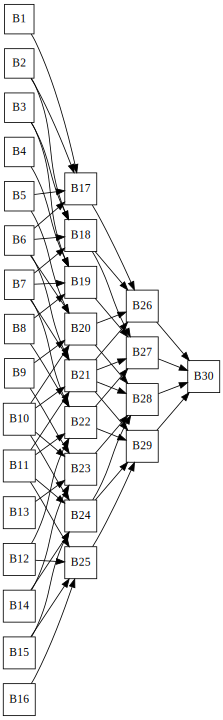

In [65]:
G

In [66]:
gg = pit.get_graph(blocks)

In [67]:
list(gg.edges)

[('B1', 'B17'),
 ('B17', 'B26'),
 ('B2', 'B17'),
 ('B2', 'B18'),
 ('B5', 'B17'),
 ('B5', 'B20'),
 ('B6', 'B17'),
 ('B6', 'B18'),
 ('B6', 'B20'),
 ('B6', 'B21'),
 ('B18', 'B26'),
 ('B18', 'B27'),
 ('B3', 'B18'),
 ('B3', 'B19'),
 ('B7', 'B18'),
 ('B7', 'B19'),
 ('B7', 'B21'),
 ('B7', 'B22'),
 ('B19', 'B27'),
 ('B4', 'B19'),
 ('B8', 'B19'),
 ('B8', 'B22'),
 ('B20', 'B26'),
 ('B20', 'B28'),
 ('B9', 'B20'),
 ('B9', 'B23'),
 ('B10', 'B20'),
 ('B10', 'B21'),
 ('B10', 'B23'),
 ('B10', 'B24'),
 ('B21', 'B26'),
 ('B21', 'B27'),
 ('B21', 'B28'),
 ('B21', 'B29'),
 ('B11', 'B21'),
 ('B11', 'B22'),
 ('B11', 'B24'),
 ('B11', 'B25'),
 ('B22', 'B27'),
 ('B22', 'B29'),
 ('B12', 'B22'),
 ('B12', 'B25'),
 ('B23', 'B28'),
 ('B13', 'B23'),
 ('B14', 'B23'),
 ('B14', 'B24'),
 ('B24', 'B28'),
 ('B24', 'B29'),
 ('B15', 'B24'),
 ('B15', 'B25'),
 ('B25', 'B29'),
 ('B16', 'B25'),
 ('B26', 'B30'),
 ('B27', 'B30'),
 ('B28', 'B30'),
 ('B29', 'B30')]

In [68]:
list(gg.nodes)

['B1',
 'B17',
 'B2',
 'B5',
 'B6',
 'B18',
 'B3',
 'B7',
 'B19',
 'B4',
 'B8',
 'B20',
 'B9',
 'B10',
 'B21',
 'B11',
 'B22',
 'B12',
 'B23',
 'B13',
 'B14',
 'B24',
 'B15',
 'B25',
 'B16',
 'B26',
 'B27',
 'B28',
 'B29',
 'B30']

In [69]:
profit = pd.read_csv('profit1.csv')
profit = profit.set_index('Block')
profit

,Metal content %,Level,Value in $
Block,,,
B1,1.00,1,-1000
B2,1.00,1,-1000
B3,1.00,1,-1000
B4,0.20,1,-2600
B5,1.50,1,0
B6,1.50,1,0
B7,1.50,1,0
B8,0.10,1,-2800
B9,1.00,1,-1000


In [70]:
m = gy.Model()

In [71]:
bl_names = list(gg.nodes)
#add decision variable
bl = m.addVars(bl_names, ub=1, vtype = GRB.CONTINUOUS, name='bl')

In [72]:
#add constraints
m_constr = m.addConstrs((bl[b] >= bl[b1] for b, b1 in list(gg.edges)), name = 'bl_constraints' )

In [73]:
#objective function
m_profit = gy.quicksum(profit.loc[b]['Value in $']*bl[b] for b in bl_names)
m.setObjective(m_profit, GRB.MAXIMIZE)

In [74]:
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 56 rows, 30 columns and 112 nonzeros
Model fingerprint: 0x42e7de79
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+03, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 21 rows and 10 columns
Presolve time: 0.02s
Presolved: 35 rows, 20 columns, 70 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.9019700e+04   1.200500e+01   0.000000e+00      0s
      12    1.4000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 12 iterations and 0.04 seconds
Optimal objective  1.400000000e+04


In [75]:
p, block_plan = pit.get_result(bl, bl_names, profit)

# Final pit design

In [76]:
block_plan

,Block,Profit/Loss
,B1,-1000.0
,B17,2000.0
,B2,-1000.0
,B5,0.0
,B6,0.0
,B18,2000.0
,B3,-1000.0
,B7,0.0
,B20,0.0
,B9,-1000.0


Total profit in this case is USD 14000

In [77]:
final_blocks = pd.DataFrame(columns=['Block', 'Profit/Loss'])
final_blocks['Block'] = block_plan['Block']
final_blocks['Profit/Loss'] = block_plan['Profit/Loss']
final_blocks

,Block,Profit/Loss
,B1,-1000.0
,B17,2000.0
,B2,-1000.0
,B5,0.0
,B6,0.0
,B18,2000.0
,B3,-1000.0
,B7,0.0
,B20,0.0
,B9,-1000.0


# Final design blocks to be mined

In [78]:
block_plan

,Block,Profit/Loss
,B1,-1000.0
,B17,2000.0
,B2,-1000.0
,B5,0.0
,B6,0.0
,B18,2000.0
,B3,-1000.0
,B7,0.0
,B20,0.0
,B9,-1000.0


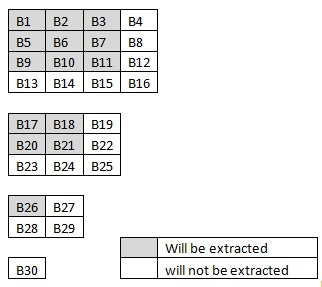